In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

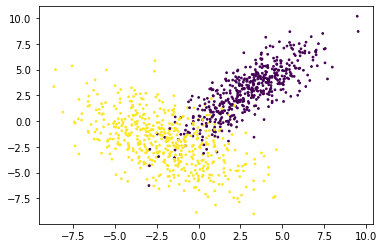

In [2]:
num_points = 500

mean_1 = [3, 3]
cov_1 = [[4, 4], [4, 6]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [-2, -2]
cov_2 = [[6, -3], [-3, 6]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

In [3]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)
print('weights ')
print(GMM.weights_)

means 
[[-1.92208921 -1.983404  ]
 [ 3.10825021  3.12816006]]
covariances 
[[[ 6.30742118 -3.23510552]
  [-3.23510552  6.26153748]]

 [[ 3.84477585  3.46786209]
  [ 3.46786209  4.92566432]]]
weights 
[0.52118291 0.47881709]


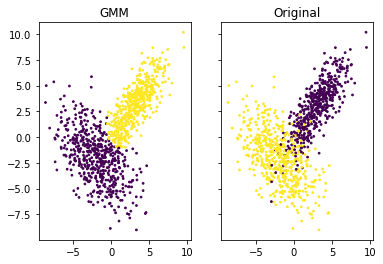

In [4]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)